In [0]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [0]:
import matplotlib.image as mpimg

In [0]:
def canny(image):
  gray=cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
  blur=cv2.GaussianBlur(gray,(5,5),0)
  canny=cv2.Canny(blur,50,150)
  return canny
  
def region_of_interest(image):
  height=image.shape[0]
  triangle=np.array([[(200,height),(1100,height),(550,250)]])
  mask=np.zeros_like(image)
  cv2.fillPoly(mask,triangle,255)
  masked_image=cv2.bitwise_and(image,mask)
  return masked_image

def display_lines(image,lines):
  line_image=np.zeros_like(image)
  if lines is not None:
    for line in lines:
      x1,y1,x2,y2 =line.reshape(4)
      cv2.line(line_image,(x1,y1),(x2,y2),(255,0,0),10)
  return line_image 

def make_coordinates(image,line_parameters):
  slope , intercept=line_parameters
  y1=image.shape[0]
  y2=int(y1*(3/5))
  x1=int((y1-intercept)/slope)
  x2=int((y2-intercept)/slope)
  return np.array([x1,y1,x2,y2])

def average_slope_intercept(image,lines):
  left_fit = []
  right_fit = []
  for line in lines:
    x1,y1,x2,y2=line.reshape(4)
    parameters=np.polyfit((x1,x2),(y1,y2),1)
    slope=parameters[0]
    intercept=parameters[1]
    if slope < 0:
      left_fit.append((slope,intercept))
    else:
      right_fit.append((slope,intercept))
  left_fit_average=np.average(left_fit,axis=0)
  right_fit_average=np.average(right_fit,axis=0)
  left_line=make_coordinates(image,left_fit_average)
  right_line=make_coordinates(image,right_fit_average)
  return np.array([left_line,right_line])

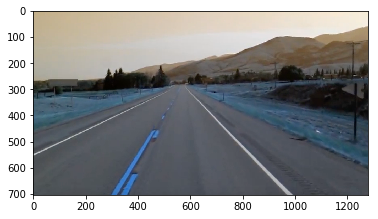

In [0]:
image =cv2.imread("test_image.jpg")
#image = mpimg.imread('test_image.jpg')
plt.imshow(image)

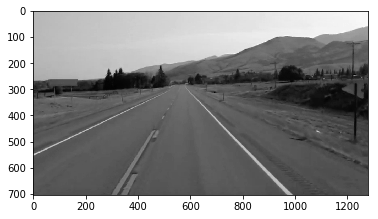

In [0]:
# Converting the image into gray scale
lane_image =np.copy(image)
gray=cv2.cvtColor(lane_image,cv2.COLOR_RGB2GRAY)
plt.imshow(gray,cmap="gray")

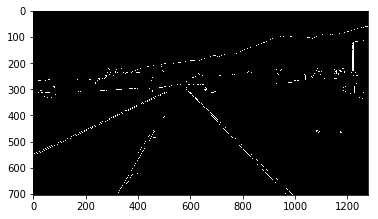

In [0]:
# Applying Gaussian blur to the gray scaled image
blur=cv2.GaussianBlur(gray,(5,5),0)
# Applying Canny edge detection to the image
canny_image=cv2.Canny(blur,50,150)
plt.imshow(canny_image,cmap="gray")


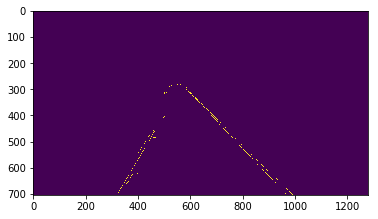

In [0]:
# Mask edges image
masked_edges=region_of_interest(canny_image)
plt.imshow(masked_edges)

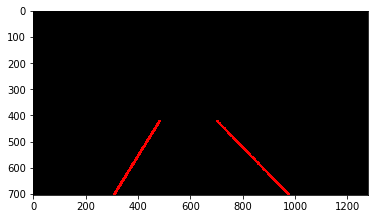

In [0]:
# Applying Hough transform to masked image
lines=cv2.HoughLinesP(masked_edges,2,np.pi/180,100,np.array([]),minLineLength=40,maxLineGap=5)
average_lines=average_slope_intercept(lane_image,lines)
line_image=display_lines(lane_image,average_lines)
plt.imshow(line_image)

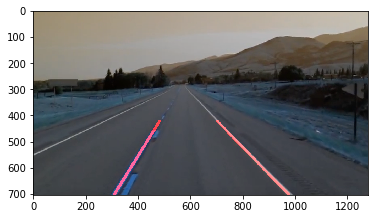

In [0]:
# Combine Edited lines image with original image
combo_image=cv2.addWeighted(lane_image,0.8,line_image,1,1)
plt.imshow(combo_image)

In [0]:
def pipline(image):
  lane_image =np.copy(image)
  gray=cv2.cvtColor(lane_image,cv2.COLOR_RGB2GRAY)
  # Applying Gaussian blur to the gray scaled image
  blur=cv2.GaussianBlur(gray,(5,5),0)
  # Applying Canny edge detection to the image
  canny_image=cv2.Canny(blur,50,150)
  masked_edges=region_of_interest(canny_image)
  lines=cv2.HoughLinesP(masked_edges,2,np.pi/180,100,np.array([]),minLineLength=40,maxLineGap=5)
  average_lines=average_slope_intercept(lane_image,lines)
  line_image=display_lines(lane_image,average_lines)
  combo_image=cv2.addWeighted(lane_image,0.8,line_image,1,1)
  return combo_image  

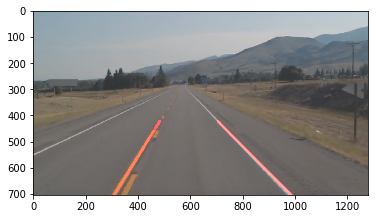

In [0]:
#image =cv2.imread("test_image.jpg")
image = mpimg.imread('test_image.jpg')
out =pipline(image)
plt.imshow(out)

In [0]:
!git clone https://github.com/rslim087a/road-video.git
  

Cloning into 'road-video'...
remote: Enumerating objects: 3, done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 3
Unpacking objects: 100% (3/3), done.


In [0]:
ls

road-video/  sample_data/  test23.mp4  test_image.jpg


In [0]:
cap=cv2.VideoCapture("test2.mp4")
while(cap.isOpened()):
  _, farme=cap.read()
  

In [0]:
# Import everything needed to edit/save/watch video clips
from moviepy.editor import VideoFileClip
from IPython.display import HTML

Imageio: 'ffmpeg-linux64-v3.3.1' was not found on your computer; downloading it now.
Try 1. Download from https://github.com/imageio/imageio-binaries/raw/master/ffmpeg/ffmpeg-linux64-v3.3.1 (43.8 MB)
Downloading: 8192/45929032 bytes (0.0%)1695744/45929032 bytes (3.7%)5955584/45929032 bytes (13.0%)10248192/45929032 bytes (22.3%)14524416/45929032 bytes (31.6%)18702336/45929032 bytes (40.7%)22962176/45929032 bytes (50.0%)27131904/45929032 bytes (59.1%)31342592/45929032 bytes (68.2%)35561472/45929032 bytes (77.4%)39772160/45929032 bytes (86.6%)44048384/45929032 bytes (95.9%)45929032/45929032 bytes (100.0%)
  Done
File saved as /root

In [0]:
white_output = 'lane_output.mp4'
## To speed up the testing process you may want to try your pipeline on a shorter subclip of the video
## To do so add .subclip(start_second,end_second) to the end of the line below
## Where start_second and end_second are integer values representing the start and end of the subclip
## You may also uncomment the following line for a subclip of the first 5 seconds
##clip1 = VideoFileClip("test_videos/solidWhiteRight.mp4").subclip(0,5)
clip1 = VideoFileClip("test23.mp4")
white_clip = clip1.fl_image(pipline) #NOTE: this function expects color images!!
%time white_clip.write_videofile(white_output, audio=False)

[MoviePy] >>>> Building video lane_output.mp4
[MoviePy] Writing video lane_output.mp4


100%|█████████▉| 409/410 [00:23<00:00, 15.94it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: lane_output.mp4 

CPU times: user 12.1 s, sys: 1.24 s, total: 13.4 s
Wall time: 24.3 s


In [0]:
HTML("""
<video width="960" height="540" controls>
  <source src="{0}">
</video>
""".format(white_output))